<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Etude-spécifique-des-parametres" data-toc-modified-id="Etude-spécifique-des-parametres-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Etude spécifique des parametres</a></span></li></ul></div>

In [1]:
# %%script pypy3
from gen_algo.genetic_algorithm import Population
from gen_algo.tools.plot import show_stats

Population parameters :
	Individuals : <class 'gen_algo.individuals.onemax.IndividualOneMax'>
	Size of an individual : 50
	Size of the population : 100
	Number of individuals selected each turns : 4
	Selection : ('select_best', 1, 10)
	Crossover : uniforme (100%)
	Mutation : ['n-flip', 5] (20.0%)
	Insertion : age


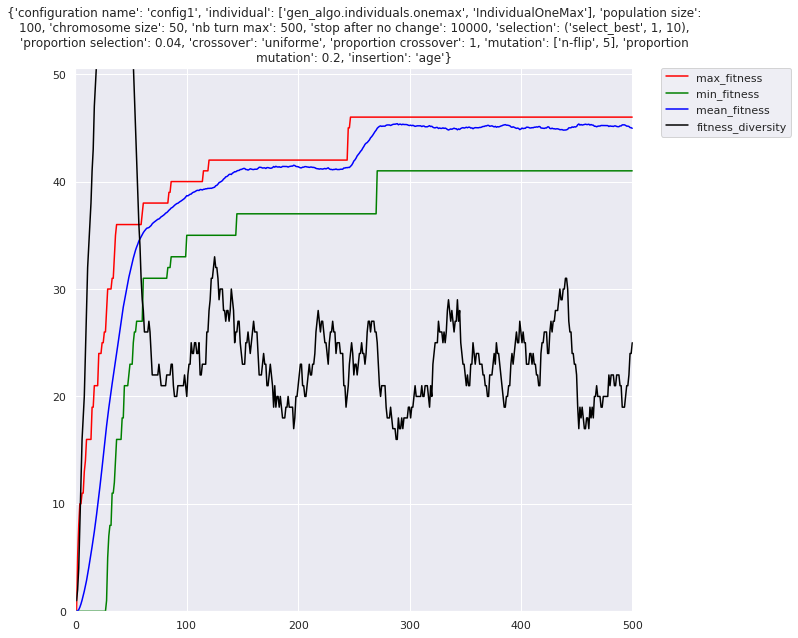

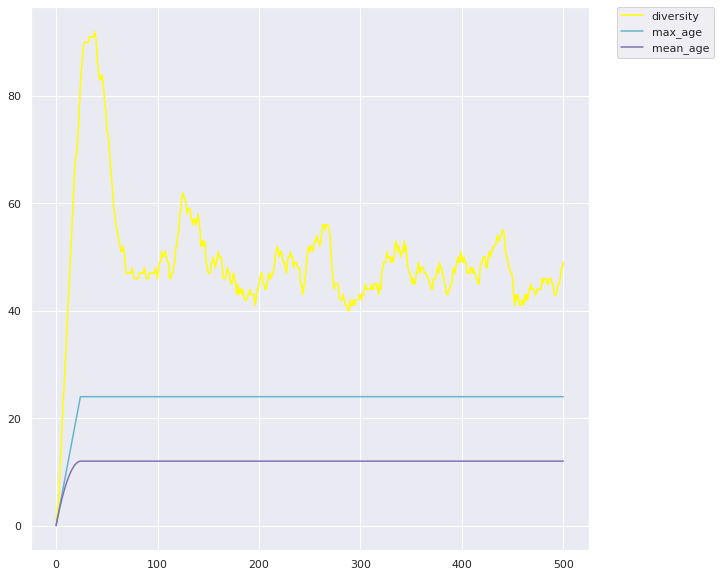

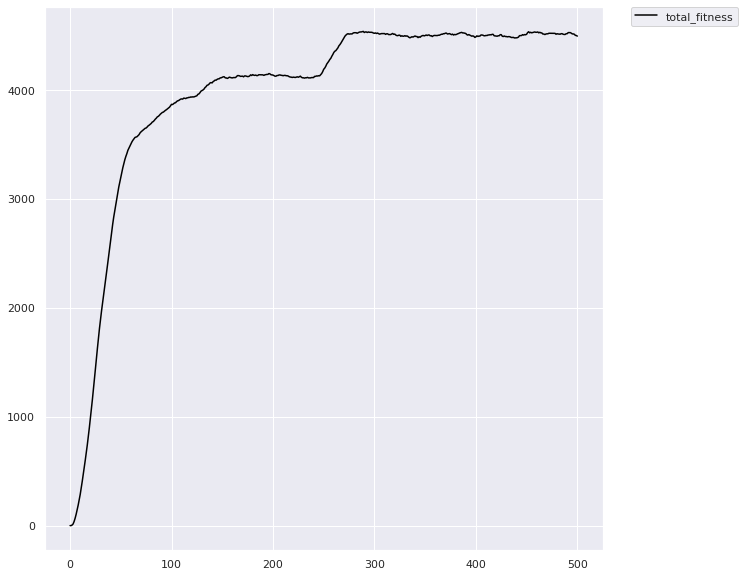

In [2]:
parameters = {
    'configuration name': 'config1',
    'individual': ['gen_algo.individuals.onemax', 'IndividualOneMax'],
    
    'population size': 100,  # 100 200 500
    'chromosome size': 50,  # 5 10 50 100
    
    'nb turn max': 500,
    'stop after no change': 10000,  # int(config['nb turn max']*0.10),

    # ('select_random',)
    # ('select_best',)
    # ('select_tournament', 2, 5)
    # ('select_wheel',)
    # ('adaptative' ,
    #            'fixed roulette wheel' 'adaptive roulette wheel' 'adaptive pursuit' 'UCB' 'DMAB'
    #            [(0.25, 'select_random'), (0.25, 'select_best'),
    #            (0.25, 'select_tournament', 2 , 5), (0.25, 'select_wheel')])
    
    'selection': ('select_best',1, 10),
    'proportion selection': 0.04,  # 2 / config['population size']
    
    'crossover': 'uniforme',  # 'mono-point' 'uniforme'
    'proportion crossover': 1,
    
    # ['n-flip', 1] ['n-flip', 3] ['n-flip', 5] ['bit-flip']
    'mutation': ['n-flip', 5],
    'proportion mutation': 0.2,  # 0.1 0.2 0.5 0.8
    
    'insertion': 'age',  # 'age' 'fitness'
}
population = Population(parameters)
stats = population.start()
show_stats(stats)

Population parameters :
	Individuals : <class 'gen_algo.individuals.onemax.IndividualOneMax'>
	Size of an individual : 50
	Size of the population : 100
	Number of individuals selected each turns : 4
	Selection : ('select_best', 1, 10)
	Crossover : uniforme (100%)
	Mutation : ['n-flip', 5] (20.0%)
	Insertion : age


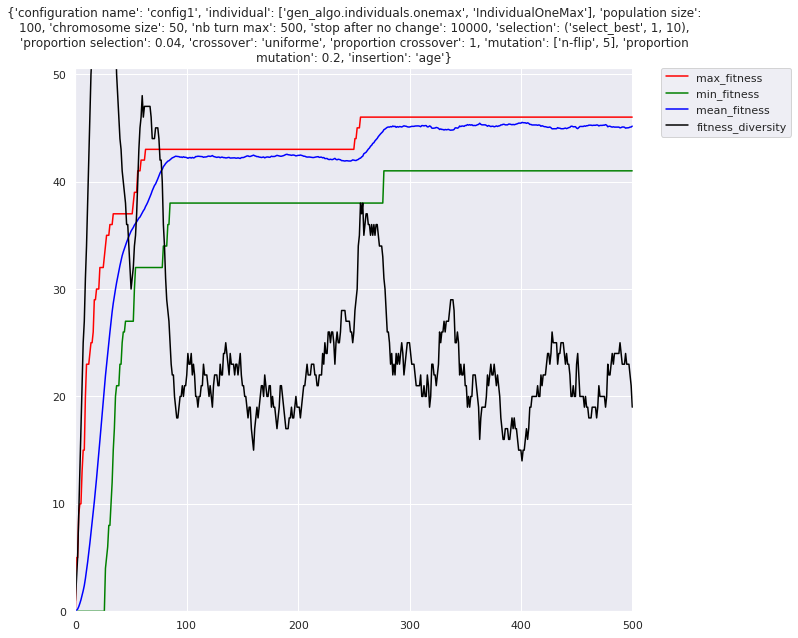

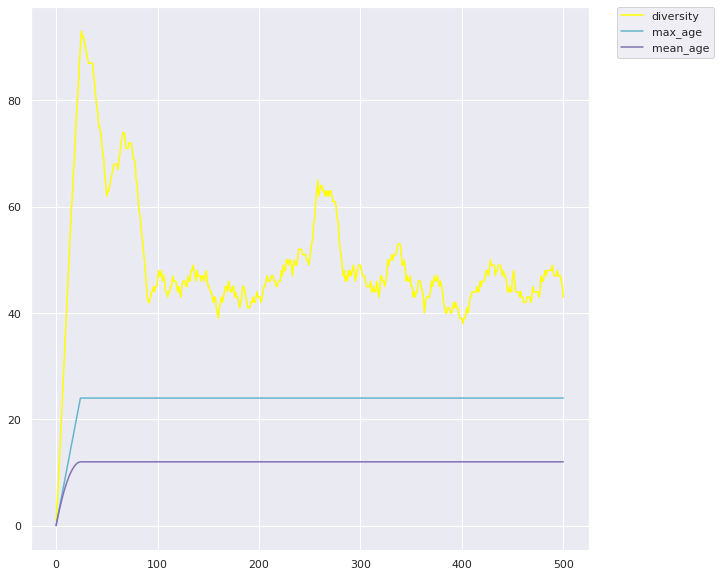

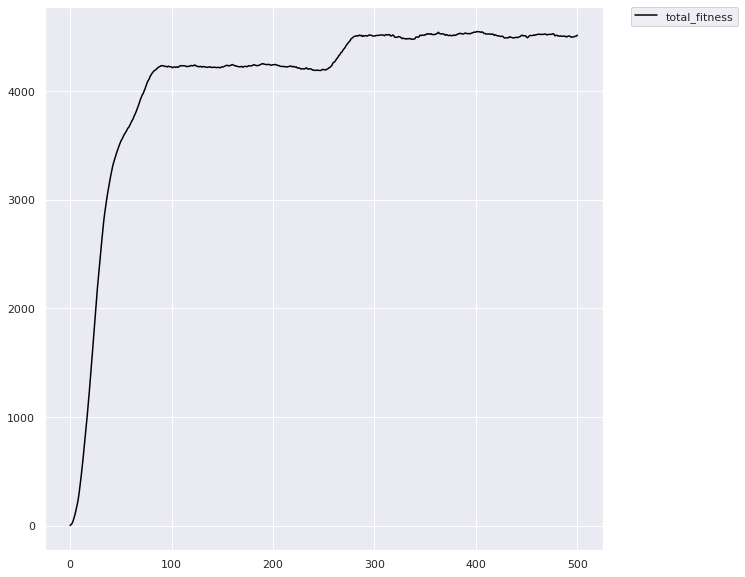

In [3]:
parameters['insertion'] = 'age'
population = Population(parameters)
stats = population.start()
show_stats(stats)

# Etude spécifique des parametres

    choisir une config "neutre":
        
        taille one max 100, tournois 5-2, croisement uniforme, bit flip, age
        
        varier taille pop 5 -> 100
        
    fixer la taille 20/30
    
        étude des selections (reste fixe)
        
            diff composants/operateurs

    => bonne config
    
        tournois 5-2 =, crossover uniforme, bit flip, fitness
        

    varier tx mutation
    tx croisement
    
    comparaison de diff config
    
    
ParamILS revac irace



In [4]:
from collections import Counter
from random import randint


def weighted_random(pairs):
    total = sum(pair[0] for pair in pairs)
    r = randint(1, total)
    for (weight, value) in pairs:
        r -= weight
        if r <= 0:
            return value


results = Counter(
    weighted_random([(1, 'a'), (1, 'b'), (18, 'c')]) for _ in range(20000))
print(results)

Counter({'c': 17962, 'a': 1045, 'b': 993})


In [5]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

In [6]:
import random
print(random.choices(
    ['apple', 'gun', 'pizza', 'sword', 'pasta', 'chicken', 'elephant'], 
    [0.1, 0.3, 0.1, 0.2, 0.1, 0.1, 0.1],
    k=3))

['gun', 'sword', 'gun']


In [7]:
def choices_no_replacement(population, weights, k=1):
    population = list(population)
    weigths = list(weights)    
    result = []
    for n in range(k):
        pos = random.choices(
            range(len(population)), 
            weights,
            k=1
        )[0]
        result.append(population[pos])
        del population[pos], weights[pos]
    return result

In [8]:
print(choices_no_replacement(
    ['apple', 'gun', 'pizza', 'sword', 'pasta', 'chicken', 'elephant'],
    [0.1    ,  0.3 ,    -1  ,    36  ,   -12  ,    -12   ,   -12],
    k=3))

['apple', 'sword', 'gun']


In [9]:
# %%script pypy3
# import sys
# print(sys.version)